In [15]:
path = 'dados/'
screen = 'MathisisGame'
accelerometer, gyroscope, info, users, usersCleanName = loadDataset(path, screen)

usuário 0 de 10


C:\Users\rodri\AppData\Local\Temp\ipykernel_10824\4190785818.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accelerometer = pd.concat([accelerometer, pd.DataFrame([df])], ignore_index=True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_10824\4190785818.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gyroscope = pd.concat([gyroscope, pd.DataFrame([df])], ignore_index=True)


usuário 1 de 10
usuário 2 de 10
usuário 3 de 10
usuário 4 de 10
usuário 5 de 10
usuário 6 de 10
usuário 7 de 10


In [3]:
gyroscope.head()
print(gyroscope.shape)

(152420, 6)


In [4]:
accelerometer.head()
print(accelerometer.shape)

(338947, 6)


# Análise Exploratória

In [5]:
len(gyroscope['user'].unique())

30

In [6]:
len(accelerometer['user'].unique())

30

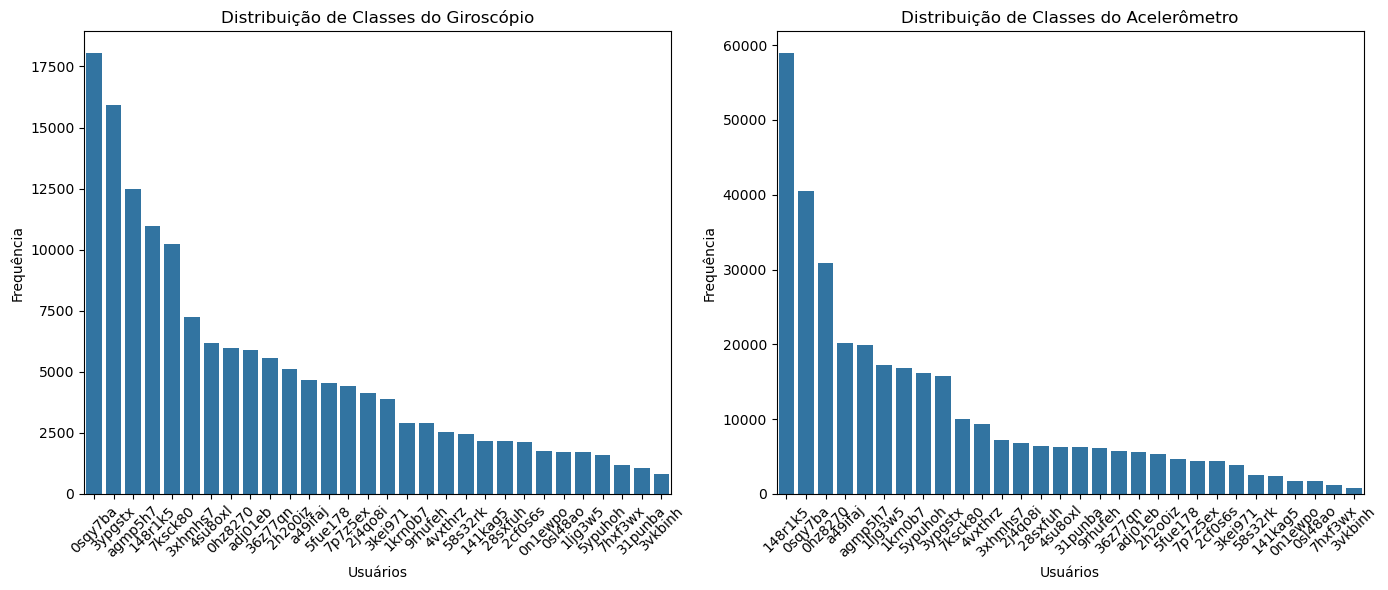

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que distribution_gyroscope e distribution_accelerometer já estejam definidos
distribution_gyroscope = gyroscope['user'].value_counts()
distribution_accelerometer = accelerometer['user'].value_counts()

# Configuração do subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para o Giroscópio
sns.barplot(ax=axes[0], x=distribution_gyroscope.index, y=distribution_gyroscope.values)
axes[0].set_title('Distribuição de Classes do Giroscópio')
axes[0].set_xlabel('Usuários')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico para o Acelerômetro
sns.barplot(ax=axes[1], x=distribution_accelerometer.index, y=distribution_accelerometer.values)
axes[1].set_title('Distribuição de Classes do Acelerômetro')
axes[1].set_xlabel('Usuários')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()


In [8]:
distribution_gyroscope

user
0sqy7ba    18038
3ypgstx    15943
agmp5h7    12490
148r1k5    10978
7ksck80    10245
3xhmhs7     7244
4su8oxl     6177
0hz8270     5981
adj01eb     5895
36z77qn     5551
2h2o0iz     5110
a49ifaj     4645
5fue178     4543
7p7z5ex     4413
2j4qo8i     4146
3kei971     3902
1krn0b7     2921
9rhufeh     2919
4vxthrz     2535
58s32rk     2442
141kag5     2161
28sxfuh     2154
2cf0s6s     2120
0n1ewpo     1774
0sl48ao     1720
1ljg3w5     1708
5ypuhoh     1602
7hxf3wx     1189
31punba     1071
3vkbinh      803
Name: count, dtype: int64

In [9]:
distribution_accelerometer

user
148r1k5    58909
0sqy7ba    40530
0hz8270    30854
a49ifaj    20179
agmp5h7    19906
1ljg3w5    17260
1krn0b7    16814
5ypuhoh    16128
3ypgstx    15707
7ksck80     9999
4vxthrz     9380
3xhmhs7     7244
2j4qo8i     6840
28sxfuh     6388
4su8oxl     6250
31punba     6246
9rhufeh     6101
36z77qn     5674
adj01eb     5571
2h2o0iz     5337
5fue178     4679
7p7z5ex     4387
2cf0s6s     4371
3kei971     3901
58s32rk     2469
141kag5     2327
0n1ewpo     1790
0sl48ao     1720
7hxf3wx     1183
3vkbinh      803
Name: count, dtype: int64

In [10]:
gyroscope

,x_gyroscope,y_gyroscope,z_gyroscope,screen,user,timestamp
0,-0.126745,-0.235183,-0.139470,MathisisGame - 1.1.1,0hz8270,1537120509532
1,-0.123699,-0.064385,0.111475,MathisisGame - 1.1.1,0hz8270,1537120509532
2,-0.247288,-0.163092,0.093247,MathisisGame - 1.1.1,0hz8270,1537120509532
3,0.994502,0.272350,-0.144540,MathisisGame - 1.1.1,0hz8270,1537120509532
4,0.337560,-0.613002,-0.872160,MathisisGame - 1.1.1,0hz8270,1537120509532
...,...,...,...,...,...,...
152415,0.105134,0.383364,1.874775,MathisisGame - tournament_november_stage.4,agmp5h7,1544362056012
152416,-0.280107,-0.688227,-0.617639,MathisisGame - tournament_november_stage.4,agmp5h7,1544362056012
152417,-0.491167,-0.073177,-0.387274,MathisisGame - tournament_november_stage.4,agmp5h7,1544362056012
152418,-0.026517,0.203587,-0.131856,MathisisGame - tournament_november_stage.4,agmp5h7,1544362056012


# Pré processamento

## Balanceamento

In [11]:
df_gyroscope_balanced = gyroscope.groupby('user').head(2200)
df_accelerometer_balanced = accelerometer.groupby('user').head(2200)

In [12]:
df_gyroscope_balanced

,x_gyroscope,y_gyroscope,z_gyroscope,screen,user,timestamp
0,-0.126745,-0.235183,-0.139470,MathisisGame - 1.1.1,0hz8270,1537120509532
1,-0.123699,-0.064385,0.111475,MathisisGame - 1.1.1,0hz8270,1537120509532
2,-0.247288,-0.163092,0.093247,MathisisGame - 1.1.1,0hz8270,1537120509532
3,0.994502,0.272350,-0.144540,MathisisGame - 1.1.1,0hz8270,1537120509532
4,0.337560,-0.613002,-0.872160,MathisisGame - 1.1.1,0hz8270,1537120509532
...,...,...,...,...,...,...
142125,-0.012551,0.400629,0.130515,MathisisGame - 2.1.4,agmp5h7,1541669569300
142126,0.498492,0.194820,0.545375,MathisisGame - 2.1.4,agmp5h7,1541669569300
142127,0.063474,0.201706,0.595633,MathisisGame - 2.1.4,agmp5h7,1541669569300
142128,0.034936,-0.015514,0.070132,MathisisGame - 2.1.4,agmp5h7,1541669569300


In [13]:
df_accelerometer_balanced

,x_accelerometer,y_accelerometer,z_accelerometer,screen,user,timestamp
0,0.033142,-0.708420,-0.664368,MathisisGame - 1.1.1,0hz8270,1537120509532
1,0.031326,-0.709000,-0.676178,MathisisGame - 1.1.1,0hz8270,1537120509532
2,0.023041,-0.691238,-0.639938,MathisisGame - 1.1.1,0hz8270,1537120509532
3,-0.072510,-0.738754,-0.547760,MathisisGame - 1.1.1,0hz8270,1537120509532
4,-0.081665,-0.698563,-0.560104,MathisisGame - 1.1.1,0hz8270,1537120509532
...,...,...,...,...,...,...
321236,0.008789,-0.805405,-0.580948,MathisisGame - 2.2.1,agmp5h7,1541751353114
321237,0.002747,-0.814377,-0.567566,MathisisGame - 2.2.1,agmp5h7,1541751353114
321238,0.007965,-0.819351,-0.578781,MathisisGame - 2.2.1,agmp5h7,1541751353114
321239,0.012436,-0.811127,-0.594757,MathisisGame - 2.2.1,agmp5h7,1541751353114


## Unindo Dataframes

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ordenar ambos os dataframes pelos usuários para garantir alinhamento
df_gyroscope_sorted = df_gyroscope_balanced.sort_values(by='user').reset_index(drop=True)
df_accelerometer_sorted = df_accelerometer_balanced.sort_values(by='user').reset_index(drop=True)

In [15]:
df_combined = pd.concat([df_gyroscope_sorted[['x_gyroscope', 'y_gyroscope', 'z_gyroscope']],
                                    df_accelerometer_sorted[['x_accelerometer', 'y_accelerometer', 'z_accelerometer']],
                                    df_gyroscope_sorted[['user']]], axis=1)

In [16]:
null_values = df_combined.isnull().sum()
print(f"Dados Nulos: {null_values}")

Dados Nulos: x_gyroscope        2394
y_gyroscope        2394
z_gyroscope        2394
x_accelerometer       0
y_accelerometer       0
z_accelerometer       0
user               2394
dtype: int64


# Normalização

In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))  # Usando o intervalo [-1, 1]

# Aplicar o scaler para as colunas do giroscópio
df_combined[['x_gyroscope', 'y_gyroscope', 'z_gyroscope']] = scaler.fit_transform(
    df_combined[['x_gyroscope', 'y_gyroscope', 'z_gyroscope']]
)

# Aplicar o scaler para as colunas do acelerômetro
df_combined[['x_accelerometer', 'y_accelerometer', 'z_accelerometer']] = scaler.fit_transform(
    df_combined[['x_accelerometer', 'y_accelerometer', 'z_accelerometer']]
)

In [18]:
df_combined

,x_gyroscope,y_gyroscope,z_gyroscope,x_accelerometer,y_accelerometer,z_accelerometer,user
0,0.026519,-0.038684,-0.041839,0.021645,-0.364646,-0.007890,0hz8270
1,0.049738,-0.009575,-0.027160,-0.009199,-0.474125,0.167260,0hz8270
2,0.039267,0.008450,-0.027636,-0.008202,-0.472849,0.184549,0hz8270
3,0.031601,-0.037019,-0.034236,-0.007630,-0.474791,0.172383,0hz8270
4,0.088189,0.034022,0.006921,-0.001497,-0.476377,0.184921,0hz8270
...,...,...,...,...,...,...,...
62691,NaN,NaN,NaN,0.043351,-0.122381,-0.235738,NaN
62692,NaN,NaN,NaN,-0.061985,-0.141661,-0.206319,NaN
62693,NaN,NaN,NaN,0.027834,-0.029497,-0.277223,NaN
62694,NaN,NaN,NaN,0.114424,-0.119119,-0.216616,NaN


In [5]:
df_combined.to_csv('df_combined_2200.csv', index=False)

In [2]:
import pandas as pd

df_combined = pd.read_csv('df_combined.csv')

In [4]:
df_combined['user'].value_counts()

user
0hz8270    1000
0n1ewpo    1000
adj01eb    1000
a49ifaj    1000
9rhufeh    1000
7p7z5ex    1000
7ksck80    1000
7hxf3wx    1000
5ypuhoh    1000
5fue178    1000
58s32rk    1000
4vxthrz    1000
4su8oxl    1000
3ypgstx    1000
3xhmhs7    1000
agmp5h7    1000
3kei971    1000
36z77qn    1000
31punba    1000
2j4qo8i    1000
2h2o0iz    1000
2cf0s6s    1000
28sxfuh    1000
1ljg3w5    1000
1krn0b7    1000
148r1k5    1000
141kag5    1000
0sqy7ba    1000
0sl48ao    1000
3vkbinh     803
Name: count, dtype: int64

In [5]:
# # Contar o número de dados por 'user'
# user_data_counts = df_combined['user'].value_counts()

# # Selecionar os 20 'users' com pelo menos 1000 dados
# selected_users = user_data_counts[user_data_counts >= 2000].head(3)

# #Filtrar o dataframe para incluir apenas esses usuários selecionados
# df_combined = df_combined[df_combined['user'].isin(selected_users.index)]

In [6]:
df_combined

,x_gyroscope,y_gyroscope,z_gyroscope,x_accelerometer,y_accelerometer,z_accelerometer,user
0,0.026519,0.060437,-0.105730,-0.147727,-0.364646,-0.007890,0hz8270
1,0.063829,0.159071,-0.091310,-0.193921,-0.370780,0.012568,0hz8270
2,0.091084,0.217019,-0.101577,-0.187897,-0.367907,0.019635,0hz8270
3,0.064079,0.162359,-0.091893,-0.224357,-0.339852,-0.052519,0hz8270
4,0.028442,0.095257,-0.093490,-0.166997,-0.366876,-0.014647,0hz8270
...,...,...,...,...,...,...,...
29798,0.002737,0.100425,-0.078642,-0.142716,-0.244051,-0.213547,agmp5h7
29799,0.048020,0.112417,-0.083512,-0.156737,-0.236719,-0.215960,agmp5h7
29800,0.038727,0.101368,-0.079448,-0.160973,-0.214410,-0.167458,agmp5h7
29801,0.048556,0.109769,-0.080571,-0.160986,-0.199578,-0.179500,agmp5h7


# Separação em treino, teste e validação

In [7]:
import pandas as pd
from sklearn.utils import shuffle

# Função para dividir dados de um único usuário
def split_user_data(user_df, train_size=0.6, val_size=0.2):
    n = len(user_df)
    train_end = int(train_size * n)
    val_end = int((train_size + val_size) * n)
    
    train_data = user_df[:train_end]
    val_data = user_df[train_end:val_end]
    test_data = user_df[val_end:]
    
    return train_data, val_data, test_data

# Listas para armazenar os dados separados
train_list = []
val_list = []
test_list = []

# Separar os dados para cada usuário
for user in df_combined['user'].unique():
    user_data = df_combined[df_combined['user'] == user]
    train_data, val_data, test_data = split_user_data(user_data)
    
    train_list.append(train_data)
    val_list.append(val_data)
    test_list.append(test_data)

# Embaralhar a ordem dos blocos de usuários, mantendo a ordem interna dos dados de cada usuário
train_list = shuffle(train_list, random_state=42)
val_list = shuffle(val_list, random_state=45)
test_list = shuffle(test_list, random_state=2)

# Concatenar os blocos mantendo a ordem interna de cada usuário
train_df = pd.concat(train_list)
val_df = pd.concat(val_list)
test_df = pd.concat(test_list)

## Janelamento

In [19]:
import numpy as np
import pandas as pd
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.preprocessing import LabelEncoder

def create_sliding_windows_per_user_optimized(data, window_size, stride, target_col='user'):
    """
    Função otimizada para criar janelas deslizantes por usuário e dividir os dados em X e y usando numpy's sliding_window_view.
    
    Args:
        data (pd.DataFrame): DataFrame combinado de giroscópio e acelerômetro.
        window_size (int): Tamanho da janela deslizante.
        stride (int): Passo (stride) da janela deslizante.
        target_col (str): Coluna usada como alvo (y).
    
    Returns:
        X (np.array): Dados de entrada, divididos em janelas.
        y (np.array): Rótulos correspondentes às janelas.
    """
    X, y = [], []
    
    # Agrupar os dados por usuário
    grouped = data.groupby(target_col)
    
    # Quantidade total de usuários
    total_users = len(grouped)
    processed_users = 0  # Contador de usuários processados
    
    # Inicializar o LabelEncoder para converter os rótulos em valores numéricos
    label_encoder = LabelEncoder()
    label_encoder.fit(data[target_col])
    
    # Iterar sobre cada usuário
    for user, group in grouped:
        group = group.reset_index(drop=True)  # Redefine o índice para cada grupo (importante para iloc)
        
        # Selecionar dados de giroscópio e acelerômetro
        gyro_data = group[['x_gyroscope', 'y_gyroscope', 'z_gyroscope']].values.astype(np.float32)
        accel_data = group[['x_accelerometer', 'y_accelerometer', 'z_accelerometer']].values.astype(np.float32)
        
        # Usar sliding_window_view para criar as janelas deslizantes
        windows_gyro = sliding_window_view(gyro_data, (window_size, 3))[::stride, :]
        windows_accel = sliding_window_view(accel_data, (window_size, 3))[::stride, :]
        
        # Remover a dimensão adicional (extra) criada por sliding_window_view
        windows_gyro = np.squeeze(windows_gyro)
        windows_accel = np.squeeze(windows_accel)
        
        # Combinar giroscópio e acelerômetro em dois canais
        windows_combined = np.stack([windows_gyro, windows_accel], axis=-1)  # (n_janelas, window_size, 3, 2)
        
        # Adicionar as janelas em X
        X.append(windows_combined)
        
        # Criar rótulos numéricos para as janelas usando LabelEncoder
        n_windows = windows_combined.shape[0]  # Número de janelas criadas
        numeric_label = label_encoder.transform([user])[0]  # Converte o usuário para um valor numérico
        y.append([numeric_label] * n_windows)  # Atribui o mesmo rótulo numérico para todas as janelas do grupo
        
        # Atualizar o contador de usuários processados
        processed_users += 1
        print(f"Usuário {processed_users}/{total_users} processado.")

    # Concatenar os resultados finais de X e y
    X = np.concatenate(X, axis=0)
    y = np.concatenate(y, axis=0)
    
    return X, y

# Definindo parâmetros
window_size = 50 # Tamanho da janela
stride = 1        # Passo (stride)

# Criando as janelas deslizantes separadamente para cada usuário
X_train, y_train = create_sliding_windows_per_user_optimized(train_df, window_size, stride)
X_valid, y_valid = create_sliding_windows_per_user_optimized(test_df, window_size, stride)
X_test, y_test = create_sliding_windows_per_user_optimized(val_df, window_size, stride)

Usuário 1/30 processado.
Usuário 2/30 processado.
Usuário 3/30 processado.
Usuário 4/30 processado.
Usuário 5/30 processado.
Usuário 6/30 processado.
Usuário 7/30 processado.
Usuário 8/30 processado.
Usuário 9/30 processado.
Usuário 10/30 processado.
Usuário 11/30 processado.
Usuário 12/30 processado.
Usuário 13/30 processado.
Usuário 14/30 processado.
Usuário 15/30 processado.
Usuário 16/30 processado.
Usuário 17/30 processado.
Usuário 18/30 processado.
Usuário 19/30 processado.
Usuário 20/30 processado.
Usuário 21/30 processado.
Usuário 22/30 processado.
Usuário 23/30 processado.
Usuário 24/30 processado.
Usuário 25/30 processado.
Usuário 26/30 processado.
Usuário 27/30 processado.
Usuário 28/30 processado.
Usuário 29/30 processado.
Usuário 30/30 processado.
Usuário 1/30 processado.
Usuário 2/30 processado.
Usuário 3/30 processado.
Usuário 4/30 processado.
Usuário 5/30 processado.
Usuário 6/30 processado.
Usuário 7/30 processado.
Usuário 8/30 processado.
Usuário 9/30 processado.
Usuá

## Salvando os Dados

In [1]:
import numpy as np

# Salvar X e y em arquivos .npy
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('X_valid.npy', X_valid)

np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
np.save('y_valid.npy', y_valid)

NameError: name 'X_train' is not defined

## Carregando os Dados

In [12]:
# # Carregar X e y de arquivos .npy
# X = np.load('X_windows.npy')
# y = np.load('y_labels.npy')
import numpy as np

# Salvar X e y em arquivos .npy
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
X_val = np.load('X_valid.npy')

y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
y_val = np.load('y_valid.npy')

print("Treino")
print(X_train.shape, y_train.shape)  # Verificar as formas dos dados carregados

print("Teste")
print(X_test.shape, y_test.shape)  # Verificar as formas dos dados carregados


print("Validação")
print(X_val.shape, y_val.shape)  # Verificar as formas dos dados carregados

Treino
(16411, 50, 3, 2) (16411,)
Teste
(4491, 50, 3, 2) (4491,)
Validação
(4491, 50, 3, 2) (4491,)


In [13]:
from tensorflow.keras.utils import to_categorical

num_classes = y_train[-1] + 1 
# Realiza one-hot encoding no y
y_train = to_categorical(y_train, num_classes=num_classes)  # considerando que y varia de 0 a 20
y_test = to_categorical(y_test, num_classes=num_classes)  # considerando que y varia de 0 a 20
y_val = to_categorical(y_val, num_classes=num_classes)  # considerando que y varia de 0 a 20

In [14]:
window_size = 50 # Tamanho da janela
stride = 1        # Passo (stride)

## CNN com maior complexidade

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

epochs = 20

# Construção do modelo
input_shape = (window_size, 3, 2, 1)  # janela, eixos, canais
inputs = layers.Input(shape=input_shape)


# Segunda camada de convolução 3D com Dropout
x = layers.Conv3D(filters=128, kernel_size=(3, 3, 2), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling3D(pool_size=(2, 1, 1))(x)
x = layers.Dropout(0.4)(x)  # Dropout para evitar overfitting

# Terceira camada de convolução 3D
x = layers.Conv3D(filters=192, kernel_size=(3, 3, 1), activation='relu', padding='same',
                  kernel_regularizer=l2(0.006))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling3D(pool_size=(2, 1, 1))(x)

# Global Average Pooling
x = layers.GlobalAveragePooling3D()(x)

# Camada densa para classificação
output = layers.Dense(num_classes, activation='softmax')(x)

# Definir o modelo
cnn_model = models.Model(inputs=inputs, outputs=output)

# Compilar o modelo com RMSprop e menor taxa de aprendizado
cnn_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00014379196954005186), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
cnn_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Treinamento do modelo com EarlyStopping e Redução de LR
complex_cnn = cnn_model.fit(X_train, y_train, 
                    epochs=epochs, batch_size=64, 
                    validation_data=(X_val, y_val), 
                    callbacks=[reduce_lr,early_stopping])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 3, 2, 1)]     0         
                                                                 
 conv3d_2 (Conv3D)           (None, 50, 3, 2, 128)     2432      
                                                                 
 batch_normalization_5 (Batc  (None, 50, 3, 2, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 25, 3, 2, 128)    0         
 3D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 25, 3, 2, 128)     0         
                                                                 
 conv3d_3 (Conv3D)           (None, 25, 3, 2, 192)     2213

# Deep Neural Network

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Definir a semente global para reprodutibilidade
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# ======= MLP ======= #

# # Achatar os dados de entrada para MLP
# X_train_mlp = X_train.reshape((X_train.shape[0], -1))  # Achatamento de (50, 3, 2) para (300)
# X_val_mlp = X_val.reshape((X_val.shape[0], -1))        # Mesmo processo para os dados de validação

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# ======= MLP com Janelamento ======= #

# Achatar os dados de entrada para MLP preservando o janelamento
X_train_mlp = X_train.reshape((X_train.shape[0], window_size * 3 * 2))  # (50 * 3 * 2) = 300
X_val_mlp = X_val.reshape((X_val.shape[0], window_size * 3 * 2))        # Mesmo processo para os dados de validação

# Hiperparâmetros fornecidos
best_hyperparams = {
    'units_1': 448,
    'dropout_1': 0.3,
    'l2_reg_1': 0.0001,
    'units_2': 192,
    'dropout_2': 0.3,
    'l2_reg_2': 0.0051,
    'units_3': 128,
    'dropout_3': 0.3,
    'l2_reg_3': 0.0091,
    'learning_rate': 0.0009196249560706999
}

# Construção do modelo MLP com Dropout, BatchNorm e Regularização
mlp_model = models.Sequential()
mlp_model.add(layers.Input(shape=(X_train_mlp.shape[1],)))  

# Primeira camada densa com regularização L2 e dropout
mlp_model.add(layers.Dense(best_hyperparams['units_1'], activation='relu', 
                           kernel_regularizer=regularizers.l2(best_hyperparams['l2_reg_1'])))
mlp_model.add(layers.BatchNormalization())
mlp_model.add(layers.Dropout(best_hyperparams['dropout_1']))

# Segunda camada densa com regularização L2 e dropout
mlp_model.add(layers.Dense(best_hyperparams['units_2'], activation='relu', 
                           kernel_regularizer=regularizers.l2(best_hyperparams['l2_reg_2'])))
mlp_model.add(layers.BatchNormalization())
mlp_model.add(layers.Dropout(best_hyperparams['dropout_2']))

# Terceira camada densa com regularização L2 e dropout
mlp_model.add(layers.Dense(best_hyperparams['units_3'], activation='relu', 
                           kernel_regularizer=regularizers.l2(best_hyperparams['l2_reg_3'])))
mlp_model.add(layers.BatchNormalization())
mlp_model.add(layers.Dropout(best_hyperparams['dropout_3']))

# Camada de saída
mlp_model.add(layers.Dense(num_classes, activation='softmax'))  # Saída softmax

# Compilar o modelo MLP com a taxa de aprendizado fornecida
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_hyperparams['learning_rate']), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Resumo do modelo MLP
mlp_model.summary()

# Definir o EarlyStopping e ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento do modelo MLP com EarlyStopping e ReduceLROnPlateau
mlp_history = mlp_model.fit(X_train_mlp, y_train, 
                            epochs=epochs, batch_size=128, 
                            validation_data=(X_val_mlp, y_val),
                            callbacks=[reduce_lr, early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 448)               134848    
                                                                 
 batch_normalization_2 (Batc  (None, 448)              1792      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 448)               0         
                                                                 
 dense_2 (Dense)             (None, 192)               86208     
                                                                 
 batch_normalization_3 (Batc  (None, 192)              768       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 192)               0

## Comparação

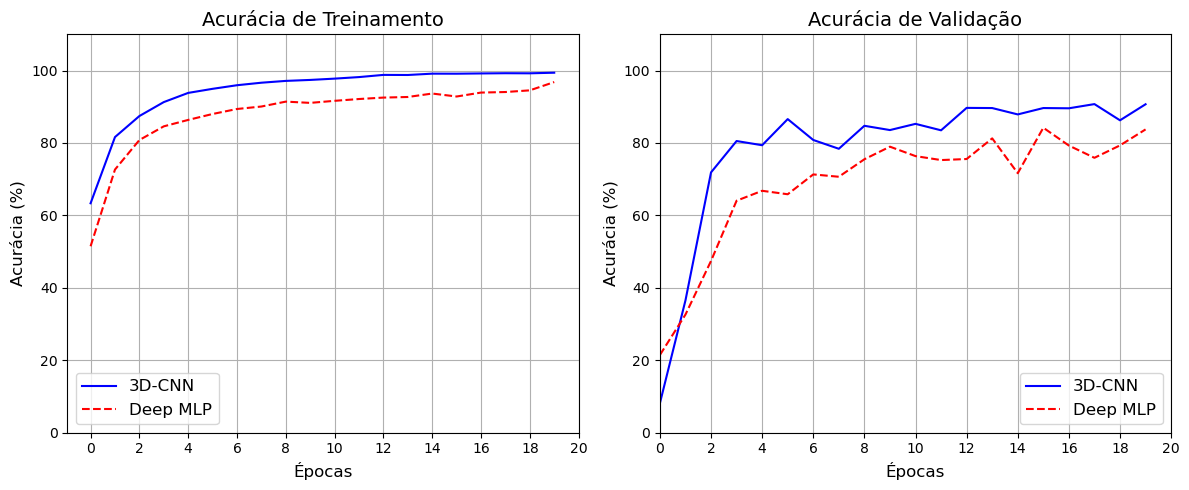

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# Função para plotar a comparação das curvas de acurácia e adicionar ponto na época de não melhora
def plot_accuracy_comparison(complex_cnn, mlp_history):
    xticks = np.arange(0, epochs + 1, 2)  # Marcas no eixo x de 5 em 5

    # Plotar as curvas de treino e validação
    plt.figure(figsize=(12, 5))

    # Comparação da acurácia de treinamento
    plt.subplot(1, 2, 1)
    plt.plot([x * 100 for x in complex_cnn.history['accuracy']], label='3D-CNN', linestyle='-', color='blue')
    plt.plot([x * 100 for x in mlp_history.history['accuracy']], label='Deep MLP', linestyle='--', color='red')
    plt.title('Acurácia de Treinamento', fontsize=14)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Acurácia (%)', fontsize=12)
    plt.ylim(0, 110)  # Definir os mesmos limites de y
    plt.xticks(xticks)  # Definir marcas no eixo x de 5 em 5
    plt.grid(True)
    plt.legend(fontsize=12)

    # Comparação da acurácia de validação
    plt.subplot(1, 2, 2)
    plt.plot([x * 100 for x in complex_cnn.history['val_accuracy']], label='3D-CNN', linestyle='-', color='blue')
    plt.plot([x * 100 for x in mlp_history.history['val_accuracy']], label='Deep MLP', linestyle='--', color='red')

    

    plt.title('Acurácia de Validação', fontsize=14)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Acurácia (%)', fontsize=12)
    plt.legend(fontsize=12,loc='lower right')
    plt.xlim(0, 20) 
    plt.xticks(xticks)  # Definir marcas no eixo x de 5 em 5
    plt.grid(True)
    plt.ylim(0, 110) 
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar os gráficos comparativos
plot_accuracy_comparison(complex_cnn, mlp_history)

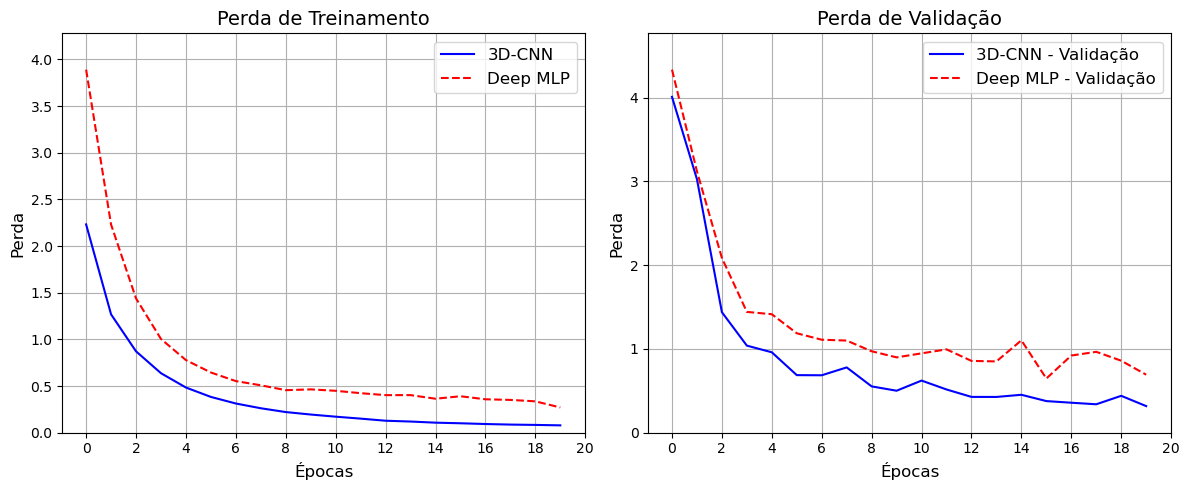

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a comparação das curvas de perda e adicionar ponto na época de não melhora
def plot_loss_comparison(complex_cnn, mlp_history):
    xticks = np.arange(0, 21, 2)  # Marcas no eixo x de 2 em 2

    # Plotar as curvas de treino e validação
    plt.figure(figsize=(12, 5))

    # Comparação da perda de treinamento
    plt.subplot(1, 2, 1)
    plt.plot(complex_cnn.history['loss'], label='3D-CNN', linestyle='-', color='blue')
    plt.plot(mlp_history.history['loss'], label='Deep MLP', linestyle='--', color='red')
    plt.title('Perda de Treinamento', fontsize=14)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Perda', fontsize=12)
    plt.ylim(0, max(max(complex_cnn.history['loss']), max(mlp_history.history['loss'])) * 1.1)  # Ajuste dos limites de y
    plt.xticks(xticks)  # Definir marcas no eixo x de 2 em 2
    plt.grid(True)
    plt.legend(fontsize=12)

    # Comparação da perda de validação
    plt.subplot(1, 2, 2)
    plt.plot(complex_cnn.history['val_loss'], label='3D-CNN - Validação', linestyle='-', color='blue')
    plt.plot(mlp_history.history['val_loss'], label='Deep MLP - Validação', linestyle='--', color='red')
    
    plt.title('Perda de Validação', fontsize=14)
    plt.xlabel('Épocas', fontsize=12)
    plt.ylabel('Perda', fontsize=12)
    plt.legend(fontsize=12, loc='upper right')
    plt.xticks(xticks)  # Definir marcas no eixo x de 2 em 2
    plt.grid(True)
    plt.ylim(0, max(max(complex_cnn.history['val_loss']), max(mlp_history.history['val_loss'])) * 1.1)  # Ajuste dos limites de y

    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_loss_comparison(complex_cnn, mlp_history)


In [21]:
# Avaliar o desempenho da 3D-CNN no conjunto de teste
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Desempenho da 3D-CNN no conjunto de teste:")
print(f"Perda (Loss): {cnn_test_loss:.4f}")
print(f"Acurácia (Accuracy): {cnn_test_accuracy * 100:.2f}%")

# Preparar X_test para a MLP (achatando os dados de entrada)
X_test_mlp = X_test.reshape((X_test.shape[0], window_size * 3 * 2))  # Mesma abordagem usada com X_train_mlp

# Avaliar o desempenho da MLP no conjunto de teste
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test_mlp, y_test, verbose=0)
print(f"Desempenho da Deep MLP no conjunto de teste:")
print(f"Perda (Loss): {mlp_test_loss:.4f}")
print(f"Acurácia (Accuracy): {mlp_test_accuracy * 100:.2f}%")

Desempenho da 3D-CNN no conjunto de teste:
Perda (Loss): 0.4570
Acurácia (Accuracy): 86.66%
Desempenho da Deep MLP no conjunto de teste:
Perda (Loss): 0.9996
Acurácia (Accuracy): 81.70%
